In [186]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [187]:
data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")

In [188]:
data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [189]:
test=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")

In [190]:
test.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [191]:
sample=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")

In [192]:
sample.head()

,id,sentiment
0,0,NEGATIVE
1,1,NEGATIVE
2,2,NEGATIVE
3,3,NEGATIVE
4,4,NEGATIVE


In [193]:
movie=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")

In [194]:
movie.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [195]:
from pandas_profiling import ProfileReport

In [196]:
profile=ProfileReport(data,minimal=True)

In [197]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [198]:
data_1=data.rename(columns={'movieid':'Movie_Id','reviewerName':'Reviewer_Name','isFrequentReviewer':'Is_Frequent_Reviewer','reviewText':'Review_Text','sentiment':'Sentiment'})

In [199]:
data_1.head()

,Movie_Id,Reviewer_Name,Is_Frequent_Reviewer,Review_Text,Sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [200]:
data_1.shape

(162758, 5)

In [201]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Movie_Id              162758 non-null  object
 1   Reviewer_Name         162758 non-null  object
 2   Is_Frequent_Reviewer  162758 non-null  bool  
 3   Review_Text           156311 non-null  object
 4   Sentiment             162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [202]:
#class imbalance

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

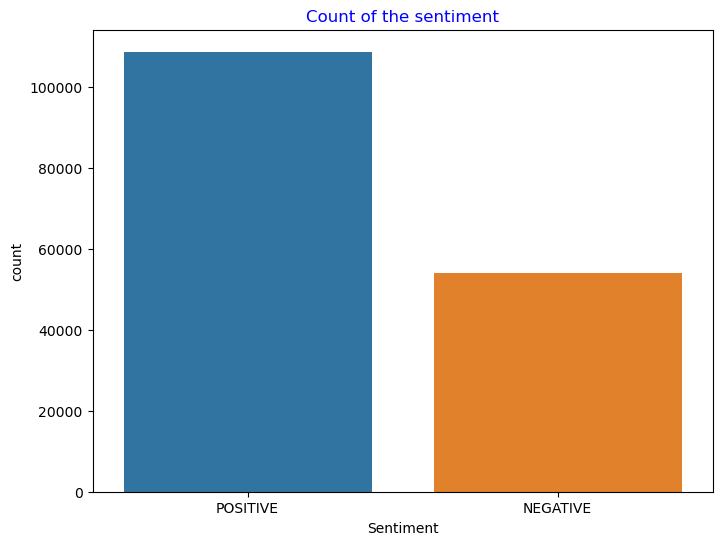

In [204]:
plt.rcParams['figure.figsize']=(8,6)
sns.countplot(data=data_1,x='Sentiment')
plt.title("Count of the sentiment",c='blue')
plt.show()

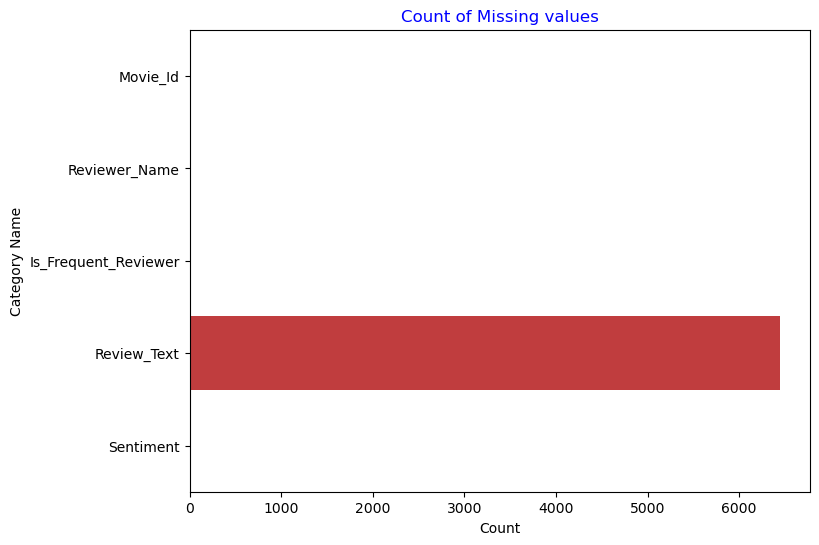

In [205]:
#Barplot of missing values column wise
n_missing=data_1.isnull().sum().values  #stores the missing values

keys_missing=data_1.isnull().sum().keys()  #stores the missing keys
sns.barplot(x=n_missing,y=keys_missing)
plt.xlabel('Count')
plt.ylabel('Category Name')
plt.title('Count of Missing values',c='Blue')
plt.show()

In [206]:
data_1['Review_Text']

0         Henry Selick’s first movie since 2009’s Corali...
1         With a cast that reads like the Vogue Oscar pa...
2         Creed II does not give us anything but another...
3         I know what you're thinking, but this is no Li...
4         Director Fernando Meirelles tells the story wi...
                                ...                        
162753    A top-notch thriller with genuine surprises an...
162754    Some people find Derek Zoolander funny and lik...
162755    This fun, gentle comedy focuses mainly on them...
162756    The film is rescued by a strong third act, but...
162757            A peerless exercise in stimulus response.
Name: Review_Text, Length: 162758, dtype: object

In [207]:
import re #for string manipulation
#basic EDA on Review_Text column
print(data_1['Review_Text'].describe())
print(data_1['Review_Text'].value_counts())
print(data_1['Review_Text'].isnull().sum())

count                      156311
unique                     155071
top       Parental Content Review
freq                           29
Name: Review_Text, dtype: object
Parental Content Review                                                                                                                                                                                                                                                29
full review at Movies for the Masses                                                                                                                                                                                                                                   24
full review in Greek                                                                                                                                                                                                                                                   13
click for full review            

In [208]:
#preprocessing on review_text
#remove special characters,numbers and extra white spaces
data_1['Review_Text'] = data_1['Review_Text'].apply(lambda x: re.sub(r"[^a-zA-Z]", " ", str(x)))
data_1['Review_Text']=data_1['Review_Text'].apply(lambda x:re.sub(r"\s+"," ",str(x)))

#convert text to lowercase
data_1['Review_Text']=data_1['Review_Text'].apply(lambda x:x.lower())

#remove stop words
stop_words=["the","and","is","in","it","to"]
data_1['Review_Text']=data_1['Review_Text'].apply(lambda x:"".join(word for word in x.split() if word not in stop_words))




In [209]:
print(data_1['Review_Text'].describe())
print(data_1['Review_Text'].value_counts())
print(data_1['Review_Text'].isnull().sum())

count     162758
unique    155013
top          nan
freq        6447
Name: Review_Text, dtype: object
nan                                                                                                                     6447
parentalcontentreview                                                                                                     29
fullreviewatmoviesformasses                                                                                               25
fullreviewgreek                                                                                                           13
clickforfullreview                                                                                                        10
                                                                                                                        ... 
withitsmeticulousattentiondetailsuperiorproductionvaluesfilmpromisesmuchmorethanitsunseasonedcastthinplottingdeliver       1
afilmenrapturechildrenma

In [210]:
#filling Review_Text with blank value

data_1["Review_Text"].fillna("",inplace=True)
data_1['Review_Text']

0         henryselicksfirstmoviesincescoralinehisfifthst...
1         withacastthatreadslikevogueoscarpartyguestlist...
2         creediidoesnotgiveusanythingbutanotherslightly...
3         iknowwhatyourethinkingbutthisnolimitlessbradle...
4         directorfernandomeirellestellsstorywithurgency...
                                ...                        
162753    atopnotchthrillerwithgenuinesurprisesagreataff...
162754    somepeoplefindderekzoolanderfunnylikableendear...
162755    thisfungentlecomedyfocusesmainlyonthemesthatfa...
162756    filmrescuedbyastrongthirdactbutgettingtheretor...
162757                    apeerlessexercisestimulusresponse
Name: Review_Text, Length: 162758, dtype: object

In [211]:
data_1.isnull().sum()

Movie_Id                0
Reviewer_Name           0
Is_Frequent_Reviewer    0
Review_Text             0
Sentiment               0
dtype: int64

In [212]:
"""
import sklearn module and necessary functions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#split the dataset into dependent(X) and independent variable(y)
X=data_1['Review_Text']
y=data_1['Sentiment']




#split the dataset into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Construct a pipeline for text classification
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LinearSVC())
])

# Set the parameters for the pipeline
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],  # Try both unigrams and bigrams
    'clf__C': [0.1, 1, 10]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


# Evaluate the accuracy of the model
scores = cross_val_score(best_model, X_train, y_train, cv=5)
accuracy = scores.mean()
print('Accuracy:', accuracy)

"""

"\nimport sklearn module and necessary functions\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.feature_extraction.text import TfidfTransformer\nfrom sklearn.svm import LinearSVC\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import cross_val_score\n\n#split the dataset into dependent(X) and independent variable(y)\nX=data_1['Review_Text']\ny=data_1['Sentiment']\n\n\n\n\n#split the dataset into training and test set\nX_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)\n\n# Construct a pipeline for text classification\npipeline = Pipeline([\n    ('vect', TfidfVectorizer()),\n    ('clf', LinearSVC())\n])\n\n# Set the parameters for the pipeline\nparameters = {\n    'vect__ngram_range': [(1, 1), (1, 2)],  # Try b

In [213]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Split the dataset into independent variable (X) and dependent variable (y)
X = data_1["Review_Text"]
y = data_1["Sentiment"]

# Encode categorical variable (Sentiment)
#y = pd.get_dummies(y, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical representation using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)  # Use transform instead of fit_transform

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6719095600884738


In [214]:
#load the test file
test=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")
df_test=test.drop(['movieid','reviewerName','isTopCritic'],axis=1)
df_test.head()

,reviewText
0,Green slowly cranks up the dread with style an...
1,Philip Noyce's direction is elegant and unforc...
2,It wouldn't do to say what path Maria ultimate...
3,Pig is not exactly the arthouse John Wick that...
4,An imaginative no-budget musical of sorts abou...


In [215]:
#filling null values with blank values

df_test['reviewText'].fillna("",inplace=True)
df_test['reviewText']


0        Green slowly cranks up the dread with style an...
1        Philip Noyce's direction is elegant and unforc...
2        It wouldn't do to say what path Maria ultimate...
3        Pig is not exactly the arthouse John Wick that...
4        An imaginative no-budget musical of sorts abou...
                               ...                        
55310    Ron Howard delivers an unconventional romantic...
55311    As an oddball art film that openly invites you...
55312    Nicholson wears his devilish grin from his fir...
55313    It's hard not be entertained by two dozen of C...
55314    Not clever enough for Smith fans, not gross en...
Name: reviewText, Length: 55315, dtype: object

In [216]:
#vectorize the test data using the same Countvectorizer used for training
X_test_vectorized=vectorizer.transform(df_test['reviewText'])

In [217]:
#make predictions on test.csv data
test_predictions=model.predict(X_test_vectorized)
test_predictions

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'POSITIVE'], dtype=object)

In [218]:
#making a submission
submission=pd.DataFrame(columns=['id','sentiment'])
submission['id']=[i for i in range(len(test_predictions))]
submission['sentiment']=test_predictions

In [219]:
submission.info

<bound method DataFrame.info of           id sentiment
0          0  POSITIVE
1          1  POSITIVE
2          2  POSITIVE
3          3  POSITIVE
4          4  POSITIVE
...      ...       ...
55310  55310  POSITIVE
55311  55311  POSITIVE
55312  55312  POSITIVE
55313  55313  POSITIVE
55314  55314  POSITIVE

[55315 rows x 2 columns]>

In [220]:
submission.shape

(55315, 2)

In [221]:

#save the submission file
submission.to_csv("submission.csv",index=False)